In [35]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

relu = np.vectorize(lambda z: np.fmax(0,z))
softmax = lambda z : z/np.sum(z, axis = 1, keepdims=True)

def simple_nn_1(x, W, b, V, c):
    a1 = x.dot(W) + b
    h1 = relu(a1)
    a2 = h1.dot(V) + c
    return np.round(softmax(a2), 2)

In [20]:
n_dims = 3
n_hidden_units = 3

np.random.seed(1234)

X = np.array([[1,0,0],[0,1,1]])
W = np.round(np.random.random((3,3)), 1)
b = np.round(np.random.random((3)), 1)
V = np.round(np.random.random((3,4)), 1)
c = np.round(np.random.random((4)), 1)

In [21]:
simple_nn_1(X,W,b,V,c)

array([[0.28, 0.22, 0.19, 0.3 ],
       [0.27, 0.22, 0.2 , 0.31]])

In [29]:
# Gradient Descent

# f(x) = 1/2 x^2

def grad_descent(x_0, iterations, stepsize):
    #theta = 0
    for i in range(iterations):
        x_0 = x_0 - stepsize * grad_f(x_0)
        #theta = theta - stepsize * x_0
    return x_0

def grad_f(x):
    return x


x = 1.

grad_descent(x, 3, 0.25)

0.421875

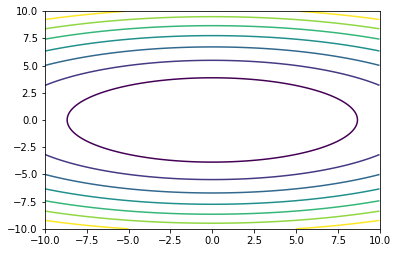

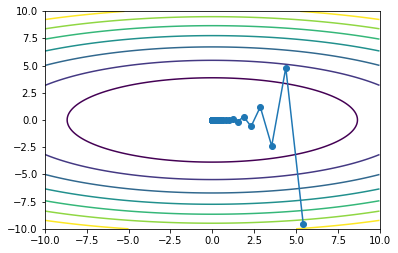

In [36]:
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = X**2 / 125 +  Y**2 / 25
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

def grad_ff(vector):
    x, y = vector
    df_dx = (2/125) * x
    df_dy = (2/16) * y
    return np.array([df_dx, df_dy])

def grad_descentt(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_ff(point)
        point = point - learning_rate * grad
        trajectory.append(point)
        
    return np.array(trajectory)

# --- Visualize Trajectory ---
np.random.seed(10)
traj = grad_descentt(iterations=50)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')